<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Human_Activity_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv1D,\
GlobalMaxPooling1D,GlobalAveragePooling1D,Flatten,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

In [3]:
!unzip -nq UCI-HAR.zip

In [9]:
#Obtain these by inspecting the files
T = 128
NTrain = 7352
NTest = 2947
D = 9 #since there are 9 files
K = 6 #number of classes (1-6)

In [10]:
def load_data():
  XTrain = np.zeros((NTrain,T,D))
  XTest = np.zeros((NTest,T,D))

  #Train Data
  ts_filenames = [
    'body_acc_x_train.txt',  'body_gyro_x_train.txt',  'total_acc_x_train.txt',
    'body_acc_y_train.txt',  'body_gyro_y_train.txt',  'total_acc_y_train.txt',
    'body_acc_z_train.txt',  'body_gyro_z_train.txt',  'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d,fn in enumerate(ts_filenames):
    df = pd.read_csv(
    f'{ts_file_prefix}Inertial Signals/{fn}',
    header = None,
    delim_whitespace = True
  )

    #NTrain x T array
    x = df.to_numpy()
    XTrain[:,:,d] = x

  YTrain = pd.read_csv(
    f'{ts_file_prefix}y_train.txt',header = None).to_numpy() - 1
  YTrain = YTrain.flatten()

  #Test Data
  ts_filenames = [
      'body_acc_x_test.txt',  'body_gyro_x_test.txt',  'total_acc_x_test.txt',
      'body_acc_y_test.txt',  'body_gyro_y_test.txt',  'total_acc_y_test.txt',
      'body_acc_z_test.txt',  'body_gyro_z_test.txt',  'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d,fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header = None,
        delim_whitespace = True
    )

    #NTrain x T array
    x = df.to_numpy()
    XTest[:,:,d] = x

  # test labels
  YTest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt',header = None
  ).to_numpy() - 1

  YTest = YTest.flatten()

  return XTrain,YTrain,XTest,YTest

In [11]:
XTrain,YTrain,XTest,YTest = load_data()

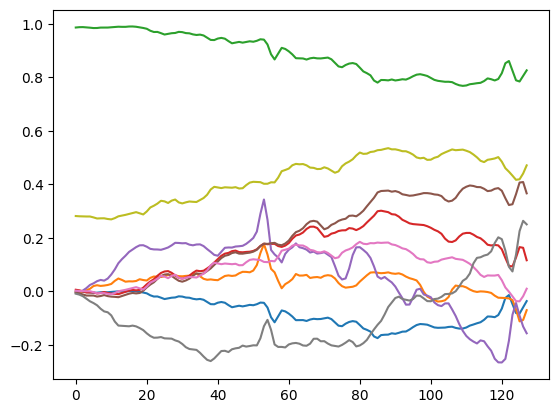

In [12]:
plt.plot(XTrain[7000,:,:]);

In [18]:
#CNN
i = Input(shape = (T,D))
x = Conv1D(32,5,activation='relu')(i)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128,3,activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)
model = Model(i,x)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 9)]          0         
                                                                 
 conv1d (Conv1D)             (None, 124, 32)           1472      
                                                                 
 max_pooling1d (MaxPooling1  (None, 41, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           24704 

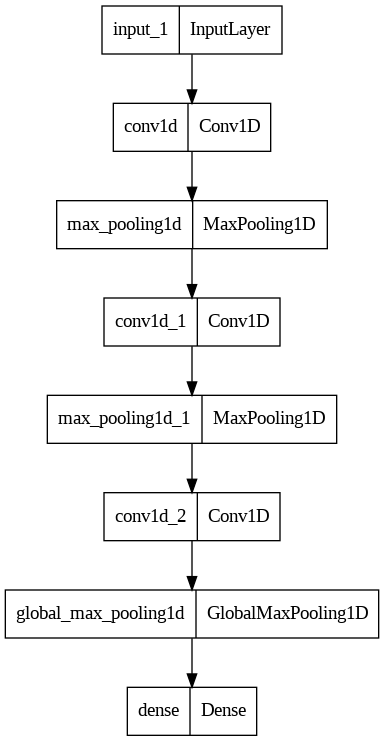

In [20]:
tf.keras.utils.plot_model(model)

In [21]:
check_point = ModelCheckpoint(
    'best_model.h5',monitor = 'val_accuracy',save_best_model = True
)

In [25]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [27]:
r = model.fit(
    XTrain,
    YTrain,
    epochs = 15,
    callbacks = [check_point],
    validation_data = (XTest,YTest)
)

Epoch 1/15
230/230 [==============================] - 3s 8ms/step - loss: 0.4093 - accuracy: 0.8545 - val_loss: 0.2280 - val_accuracy: 0.9101
Epoch 2/15
 28/230 [==>...........................] - ETA: 1s - loss: 0.1433 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 2s 8ms/step - loss: 0.1257 - accuracy: 0.9480 - val_loss: 0.2007 - val_accuracy: 0.9264
Epoch 3/15
230/230 [==============================] - 3s 13ms/step - loss: 0.1106 - accuracy: 0.9551 - val_loss: 0.2016 - val_accuracy: 0.9311
Epoch 4/15
230/230 [==============================] - 4s 15ms/step - loss: 0.1012 - accuracy: 0.9593 - val_loss: 0.1872 - val_accuracy: 0.9223
Epoch 5/15
230/230 [==============================] - 3s 13ms/step - loss: 0.0999 - accuracy: 0.9572 - val_loss: 0.1794 - val_accuracy: 0.9345
Epoch 6/15
230/230 [==============================] - 3s 11ms/step - loss: 0.0955 - accuracy: 0.9581 - val_loss: 0.1914 - val_accuracy: 0.9203
Epoch 7/15
230/230 [==============================] - 2s 10ms/step - loss: 0.0898 - accuracy: 0.9606 - val_loss: 0.1550 - val_accuracy: 0.9342
Epoch 8/15
230/230 [==============================] - 4s 15ms/step - loss: 0.0916 - accuracy: 0.9612 - val_loss: 0.2117 - val_accuracy: 0.9169
Epoch 9/15


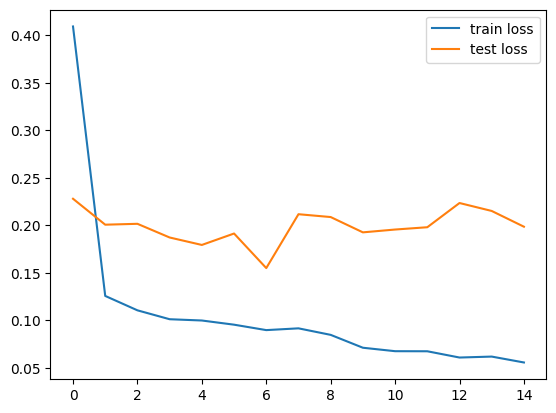

In [28]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'test loss')
plt.legend();

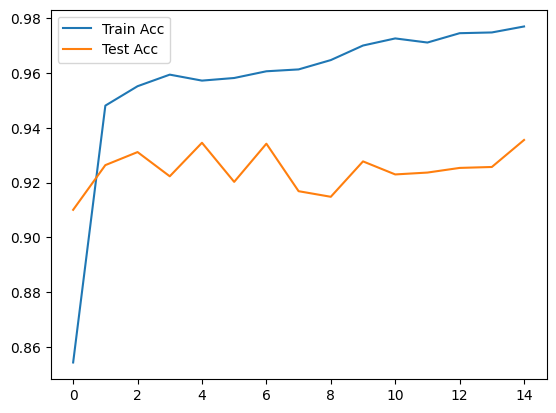

In [29]:
plt.plot(r.history['accuracy'],label = 'Train Acc')
plt.plot(r.history['val_accuracy'],label = 'Test Acc')
plt.legend();

In [30]:
#Load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [31]:
#Make prediction
PTest = best_model.predict(XTest)

93/93 [==============================] - 0s 2ms/step


In [32]:
#Evaluate
np.mean(np.argmax(PTest,axis = 1) == YTest)

0.9355276552426196

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
def load_features():
  #Train Data
  df = pd.read_csv(
      'UCI HAR Dataset/train/X_train.txt',
      header = None,
      delim_whitespace = True
  )

  feat_train = df.to_numpy()

  #Test Data
  df = pd.read_csv(
      'UCI HAR Dataset/test/X_test.txt',
      header = None,
      delim_whitespace = True
  )

  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train= scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train,feat_test

In [37]:
feat_train,feat_test = load_features()

In [44]:
#Combined model

#CNN
i = Input(shape = (T,D))
x = Conv1D(32,5,activation = 'relu')(i)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3,activation = 'relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128,3,activation
           = 'relu')(x)
x = GlobalMaxPooling1D()(x)

#ANN
D_feat = feat_train.shape[1]
i2 = Input(shape = (D_feat,))
x2 = Dense(64,activation = 'relu')(i2)

from tensorflow.keras.layers import Concatenate
x = Concatenate()([x,x2])
x = Dense(K)(x)
model = Model([i,i2],x)

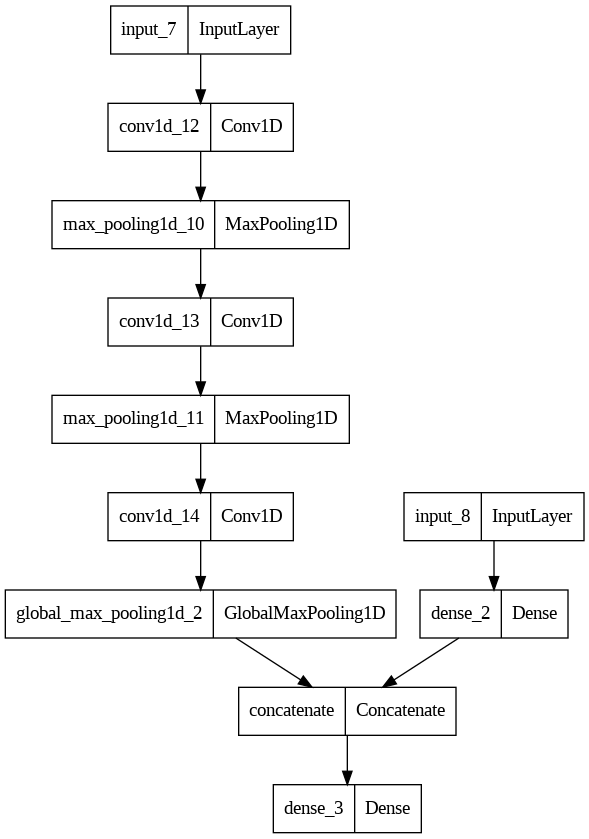

In [46]:
tf.keras.utils.plot_model(model)

In [47]:
check_point3 = ModelCheckpoint(
    'best_model_combine',monitor = 'val_accuracy',save_best_model = True,
)

In [53]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [54]:
r = model.fit(
    [XTrain,feat_train],
    YTrain,
    epochs = 15,
    callbacks = [check_point3],
    validation_data = ([XTest,feat_test],YTest)
)

Epoch 1/15
230/230 [==============================] - 56s 244ms/step - loss: 0.2265 - accuracy: 0.9204 - val_loss: 0.1586 - val_accuracy: 0.9362
Epoch 2/15
230/230 [==============================] - 4s 17ms/step - loss: 0.0734 - accuracy: 0.9721 - val_loss: 0.1199 - val_accuracy: 0.9549
Epoch 3/15
230/230 [==============================] - 4s 19ms/step - loss: 0.0535 - accuracy: 0.9810 - val_loss: 0.1176 - val_accuracy: 0.9579
Epoch 4/15
230/230 [==============================] - 3s 13ms/step - loss: 0.0489 - accuracy: 0.9808 - val_loss: 0.1650 - val_accuracy: 0.9372
Epoch 5/15
230/230 [==============================] - 3s 14ms/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.1218 - val_accuracy: 0.9610
Epoch 6/15
230/230 [==============================] - 3s 11ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.1077 - val_accuracy: 0.9627
Epoch 7/15
230/230 [==============================] - 3s 13ms/step - loss: 0.0334 - accuracy: 0.9876 - val_loss: 0.0961 - val_accuracy: 0.96

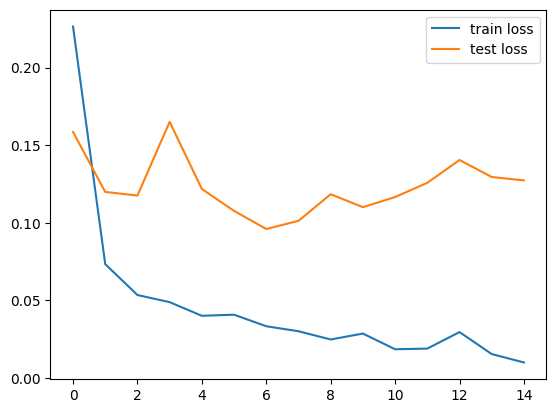

In [55]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'test loss')
plt.legend();

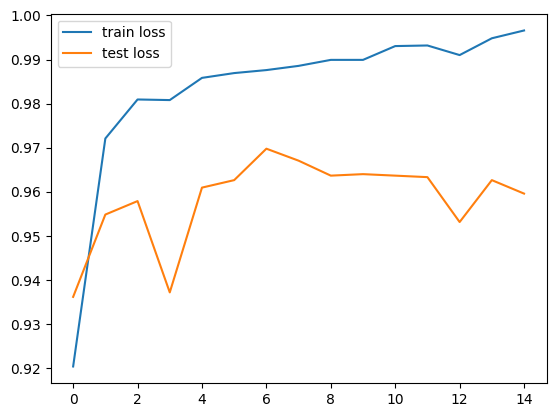

In [56]:
plt.plot(r.history['accuracy'],label = 'train loss')
plt.plot(r.history['val_accuracy'],label = 'test loss')
plt.legend();

In [58]:
#Load best model
best_model = tf.keras.models.load_model('best_model_combine')

In [59]:
#Make prediction
PTest = best_model.predict([XTest,feat_test])

93/93 [==============================] - 1s 6ms/step


In [60]:
#evaluate
np.mean(np.argmax(PTest,axis = 1) == YTest)

0.9596199524940617